In [2]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import studentized_range
from statsmodels.stats.power import TTestIndPower


In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [6]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [7]:
outcome_mean = data.Outcome.mean()
outcome_std = data.Outcome.std()
outcome_mean, outcome_std

(0.3489583333333333, 0.47695137724279896)

In [8]:
#power analysis for sample size
# parameters for the analysis 
alpha = 0.05 # significance level
expected_mean = [0.35, 0.4, 0.45, 0.5, 0.6] # expected mean of the test statistic
power = 0.8 

effect_size = (expected_mean - outcome_mean)/outcome_std

for i in range(len(expected_mean)):
    # calculate the sample size
    effect_size = (expected_mean[i] - outcome_mean)/outcome_std

    sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power)
    print('Sample size for expected_mean of {} is {}'.format(expected_mean[i], sample_size))


Sample size for expected_mean of 0.35 is 3290996.497277214
Sample size for expected_mean of 0.4 is 1371.6380500782711
Sample size for expected_mean of 0.45 is 350.733972079894
Sample size for expected_mean of 0.5 is 157.49386945739352
Sample size for expected_mean of 0.6 is 57.63844177574464


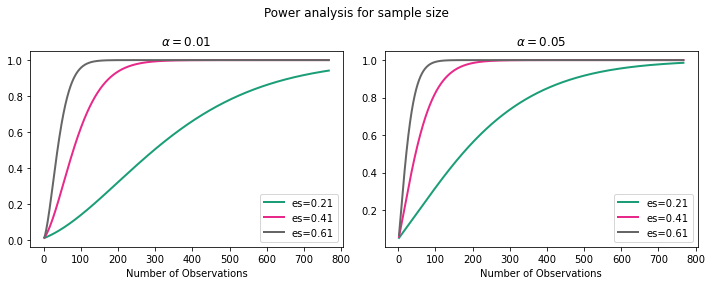

In [9]:
# power vs. number of observations 
expected_mean = 0.45
effect_size = (expected_mean - outcome_mean)/outcome_std

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, data.shape[0]),
                                 effect_size=[effect_size, effect_size+0.2, effect_size+0.4],
                                 alpha=0.01,
                                 ax=ax, title=r'$\alpha = 0.01$')
#
# ax.get_legend().remove()
ax = fig.add_subplot(1,2,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, data.shape[0]),
                                 effect_size=[effect_size, effect_size+0.2, effect_size+0.4],
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$')
#fig title at below
fig.suptitle('Power analysis for sample size')
fig.tight_layout()

In [10]:
df_test = data.sample(frac=0.9,random_state=1)
df_control = data[~data.index.isin(df_test.index)]
df_test.shape, df_control.shape, data.shape

((691, 9), (77, 9), (768, 9))

In [11]:
df_test_nopgs = data[data.Pregnancies == 0]
df_test_pgs = data[data.Pregnancies != 0]

df_test_nopgs.shape, df_test_pgs.shape, data.shape

((111, 9), (657, 9), (768, 9))

In [12]:
stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome)

LeveneResult(statistic=0.024934919349742738, pvalue=0.8745709531991697)

In [13]:
stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome)

Ttest_indResult(statistic=-0.1579079458093947, pvalue=0.8745709531992204)

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data_new = data.copy()
data_new['if_pregnancies'] = np.where(data['Pregnancies'] == 0,0,1)
data_new['if_glucose'] = np.where(data['Glucose'] < data.Glucose.mean(),0,1)
data_new['if_bloodpressure'] = np.where(data['BloodPressure'] < data.BloodPressure.mean(),0,1)
data_new['if_skinthickness'] = np.where(data['SkinThickness'] < data.SkinThickness.mean(),0,1)
data_new['if_insulin'] = np.where(data['Insulin'] < data.Insulin.mean(),0,1)
data_new['if_bmi'] = np.where(data['BMI'] < data.BMI.mean(),0,1)
data_new['if_DPF'] = np.where(data['DiabetesPedigreeFunction'] < data.DiabetesPedigreeFunction.mean(),0,1)
data_new['if_age'] = np.where(data['Age'] < data.Age.mean(),0,1)
data_new = data_new.drop(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],axis=1)
data_new.head(10)


Outcome  if_pregnancies  if_glucose  if_bloodpressure  if_skinthickness  \
0        1               1           1                 1                 1   
1        0               1           0                 0                 1   
2        1               1           1                 0                 0   
3        0               1           0                 0                 1   
4        1               0           1                 0                 1   
5        0               1           0                 1                 0   
6        1               1           0                 0                 1   
7        0               1           0                 0                 0   
8        1               1           1                 1                 1   
9        1               1           1                 1                 0   

   if_insulin  if_bmi  if_DPF  if_age  
0           0       1       1       1  
1           0       0       0       0  
2           0       0       1       0  
3           1       0       0       0  
4           1       1       1       0  
5           0       0       0       0  
6           1       0       0       0  
7           0       1       0       0  
8           1       0       0       1  
9           0       0       0       1

In [33]:
df_test_nopgs = data_new[data_new.if_pregnancies == 0]
df_test_pgs = data_new[data_new.if_pregnancies != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)
print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(111, 9) (657, 9) (768, 9)
LeveneResult(statistic=0.024934919349742738, pvalue=0.8745709531991697)
Ttest_indResult(statistic=-0.1579079458093947, pvalue=0.8745709531992204)


In [17]:
df_test_nopgs = data_new[data_new.if_glucose == 0]
df_test_pgs = data_new[data_new.if_glucose != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)
print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(419, 9) (349, 9) (768, 9)
LeveneResult(statistic=71.07585202135621, pvalue=1.6982665536238488e-16)
Ttest_indResult(statistic=-12.139582665859091, pvalue=3.8452569387796545e-31)


In [18]:
df_test_nopgs = data_new[data_new.if_bloodpressure == 0]
df_test_pgs = data_new[data_new.if_bloodpressure != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(318, 9) (450, 9) (768, 9)
LeveneResult(statistic=14.976473455529398, pvalue=0.0001181312865167943)
Ttest_indResult(statistic=-3.869944890502887, pvalue=0.00011813128651681202)


In [19]:
df_test_nopgs = data_new[data_new.if_skinthickness == 0]
df_test_pgs = data_new[data_new.if_skinthickness != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(351, 9) (417, 9) (768, 9)
LeveneResult(statistic=7.107462231474806, pvalue=0.007838184286341685)
Ttest_indResult(statistic=-2.665982413947025, pvalue=0.007838184286342711)


In [20]:
df_test_nopgs = data_new[data_new.if_insulin == 0]
df_test_pgs = data_new[data_new.if_insulin != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(479, 9) (289, 9) (768, 9)
LeveneResult(statistic=10.019637253810599, pvalue=0.0016100817291076965)
Ttest_indResult(statistic=-3.165381059811061, pvalue=0.0016100817291079983)


In [21]:
df_test_nopgs = data_new[data_new.if_bmi == 0]
df_test_pgs = data_new[data_new.if_bmi != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(373, 9) (395, 9) (768, 9)
LeveneResult(statistic=52.0794307607017, pvalue=1.2845403628871487e-12)
Ttest_indResult(statistic=-7.216607981642184, pvalue=1.2845403628873983e-12)


In [22]:
df_test_nopgs = data_new[data_new.if_age == 0]
df_test_pgs = data_new[data_new.if_age != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(474, 9) (294, 9) (768, 9)
LeveneResult(statistic=48.46983113057842, pvalue=7.217048335611012e-12)
Ttest_indResult(statistic=-6.962027803059854, pvalue=7.217048335612372e-12)


In [23]:
df_test_nopgs = data_new[data_new.if_DPF == 0]
df_test_pgs = data_new[data_new.if_DPF != 0]

print(df_test_nopgs.shape, df_test_pgs.shape, data.shape)

print(stats.levene(df_test_nopgs.Outcome,df_test_pgs.Outcome))

print(stats.ttest_ind(df_test_nopgs.Outcome,df_test_pgs.Outcome))

(473, 9) (295, 9) (768, 9)
LeveneResult(statistic=16.7658234626087, pvalue=4.67837915863606e-05)
Ttest_indResult(statistic=-4.094609073233817, pvalue=4.6783791586370965e-05)


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for var in data.columns:
    if var != 'Outcome':
        print(sm.stats.anova_lm(ols('Outcome ~ ' + var, data).fit()))

                df      sum_sq   mean_sq          F        PR(>F)
Pregnancies    1.0    8.591143  8.591143  39.670227  5.065127e-10
Residual     766.0  165.888024  0.216564        NaN           NaN
             df      sum_sq    mean_sq           F        PR(>F)
Glucose     1.0   37.983801  37.983801  213.161752  8.935432e-43
Residual  766.0  136.495366   0.178192         NaN           NaN
                  df      sum_sq   mean_sq        F    PR(>F)
BloodPressure    1.0    0.738726  0.738726  3.25695  0.071514
Residual       766.0  173.740441  0.226815      NaN       NaN
                  df      sum_sq   mean_sq         F    PR(>F)
SkinThickness    1.0    0.974971  0.974971  4.304381  0.038348
Residual       766.0  173.504195  0.226507       NaN       NaN
             df      sum_sq   mean_sq          F    PR(>F)
Insulin     1.0    2.973608  2.973608  13.281108  0.000286
Residual  766.0  171.505559  0.223898        NaN       NaN
             df      sum_sq    mean_sq          F      

In [29]:
formula = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age'
anova_results = anova_lm(ols(formula, data).fit())
print(anova_results)


                             df      sum_sq    mean_sq           F  \
Pregnancies                 1.0    8.591143   8.591143   53.638189   
Glucose                     1.0   34.020758  34.020758  212.406175   
BloodPressure               1.0    0.123476   0.123476    0.770911   
SkinThickness               1.0    0.863789   0.863789    5.393003   
Insulin                     1.0    0.255349   0.255349    1.594251   
BMI                         1.0    6.780158   6.780158   42.331432   
DiabetesPedigreeFunction    1.0    1.817752   1.817752   11.349002   
Age                         1.0    0.458924   0.458924    2.865257   
Residual                  759.0  121.567819   0.160168         NaN   

                                PR(>F)  
Pregnancies               6.164705e-13  
Glucose                   1.327103e-42  
BloodPressure             3.802132e-01  
SkinThickness             2.048132e-02  
Insulin                   2.071077e-01  
BMI                       1.398272e-10  
DiabetesPedi

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for var in ['Pregnancies','Glucose','SkinThickness','BMI','DiabetesPedigreeFunction']:
    print( var,':')
    print(pairwise_tukeyhsd(data.Outcome,data[var]))


Pregnancies :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1275  0.755 -0.3326 0.0776  False
     0      2  -0.1579 0.5013 -0.3769 0.0611  False
     0      3   0.0177    1.0 -0.2216  0.257  False
     0      4  -0.0041    1.0 -0.2506 0.2424  False
     0      5   0.0261    1.0 -0.2348 0.2869  False
     0      6  -0.0223    1.0  -0.295 0.2503  False
     0      7   0.2132 0.4167 -0.0697 0.4961  False
     0      8   0.2366 0.3382 -0.0643 0.5375  False
     0      9   0.3005  0.153  -0.038 0.6391  False
     0     10   0.0743    1.0 -0.2861 0.4347  False
     0     11    0.294 0.8397  -0.212 0.8001  False
     0     12   0.1021    1.0 -0.4527 0.6569  False
     0     13   0.1577 0.9998 -0.3709 0.6862  False
     0     14   0.6577 0.8492 -0.4845 1.7998  False
     0     15   0.6577 0.9927 -0.9504 2.2658  False
     0     17   0.6577 0.9927 -0.9504 2.2658  Fals

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      7   0.1123    1.0  -1.227 1.4516  False
     0      8  -0.3877    1.0  -1.727 0.9516  False
     0     10  -0.3877 0.9999 -1.2402 0.4649  False
     0     11  -0.3877 0.9992 -1.1676 0.3923  False
     0     12  -0.2448    1.0 -0.9685 0.4789  False
     0     13  -0.2968 0.9985  -0.879 0.2854  False
     0     14  -0.0543    1.0 -0.8343 0.7256  False
     0     15  -0.3162 0.9606 -0.8355 0.2031  False
     0     16  -0.3877 0.9992 -1.1676 0.3923  False
     0     17  -0.2448 0.9998 -0.7641 0.2745  False
     0     18  -0.1877    1.0 -0.6275 0.2522  False
     0     19   -0.221 0.9997 -0.6828 0.2408  False
     0     20  -0.2338    1.0 -0.7716  0.304  False
     0     21  -0.1877    1.0  -0.797 0.4217  False
     0     22  -0.1377    1.0 -0.6254 0.3501  False
     0     23  -0.2058 0.9994 -0.6269 0.2152  False
     0     2

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0   18.2  -0.1818    1.0 -1.5918 1.2282  False
   0.0   18.4  -0.1818    1.0 -2.4428 2.0792  False
   0.0   19.1  -0.1818    1.0 -2.4428 2.0792  False
   0.0   19.3  -0.1818    1.0 -2.4428 2.0792  False
   0.0   19.4  -0.1818    1.0 -2.4428 2.0792  False
   0.0   19.5  -0.1818    1.0 -1.8459 1.4822  False
   0.0   19.6  -0.1818    1.0 -1.5918 1.2282  False
   0.0   19.9  -0.1818    1.0 -2.4428 2.0792  False
   0.0   20.0  -0.1818    1.0 -2.4428 2.0792  False
   0.0   20.1  -0.1818    1.0 -2.4428 2.0792  False
   0.0   20.4  -0.1818    1.0 -1.8459 1.4822  False
   0.0   20.8  -0.1818    1.0 -1.8459 1.4822  False
   0.0   21.0  -0.1818    1.0 -1.8459 1.4822  False
   0.0   21.1  -0.1818    1.0 -1.4458 1.0821  False
   0.0   21.2  -0.1818    1.0 -2.4428 2.0792  False
   0.0   21.7  -0.1818    1.0 -2.4428 2.0792  False
   0.0   21.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
for var in ['if_pregnancies','if_glucose','if_skinthickness','if_bmi','if_DPF']:
    print( var,':')
    print(pairwise_tukeyhsd(data_new.Outcome,data_new[var]))

if_pregnancies :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0077 0.8746 -0.0884 0.1039  False
---------------------------------------------------
if_glucose :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.3845  -0.0 0.3223 0.4467   True
-------------------------------------------------
if_skinthickness :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0917 0.0078 0.0242 0.1593   True
--------------------------------------------------
if_bmi :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.2406

In [32]:
lm = ols('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', data=data).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           7.36e-55
Time:                        05:24:00   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

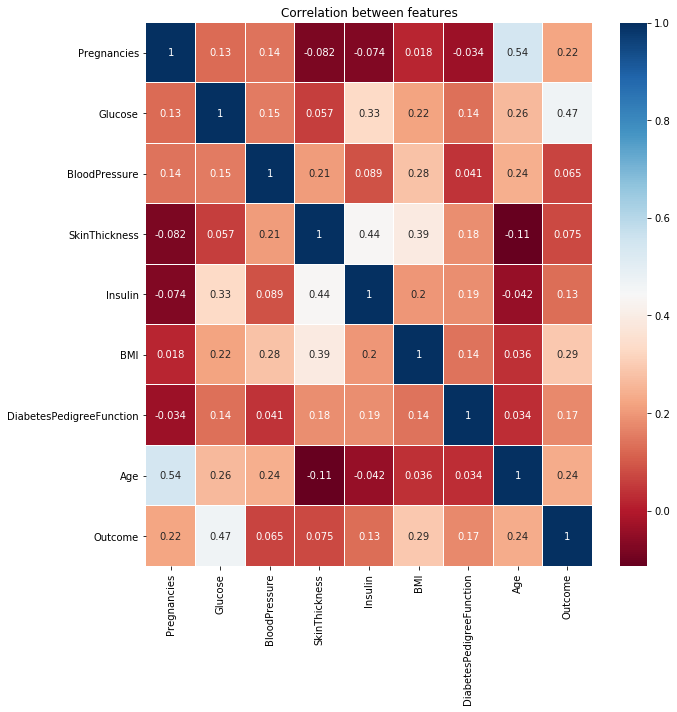

In [34]:
f, ax= plt.subplots(figsize = (10, 10))

corr = data.corr()
print(corr)
sns.heatmap(corr,cmap='RdBu',annot = True, linewidths = 0.05)


ax.set_title('Correlation between features')
plt.show()
plt.close()
f.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')


In [62]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [39]:
train_data, test_data, train_target, test_target = train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
clf = LinearRegression()
clf.fit(train_data,train_target)
score = r2_score(test_target,clf.predict(test_data))
print("LinearRegression",score)


LinearRegression 0.32230203252064193


In [52]:
from sklearn.metrics import accuracy_score

#y_pred = model.predict(X)
#accuracy_score(y, y_pred)


for model in [LinearSVC(), LogisticRegression(), xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)]:

    clf = model.fit(X, y)
    clf.fit(train_data,train_target)
    score = accuracy_score(test_target,clf.predict(test_data))
    #score = clf.score(X, y)
    print(model, score)

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LinearSVC() 0.7142857142857143
LogisticRegression() 0.8246753246753247
XGBClassifier(learning_rate=0.05, n_estimators=300) 0.8311688311688312


In [53]:
import shap
import xgboost as xgb
shap.initjs()  

[0.08684153 0.33642477 0.05928363 0.09117035 0.07545016 0.1339427
 0.08466673 0.1322201 ]


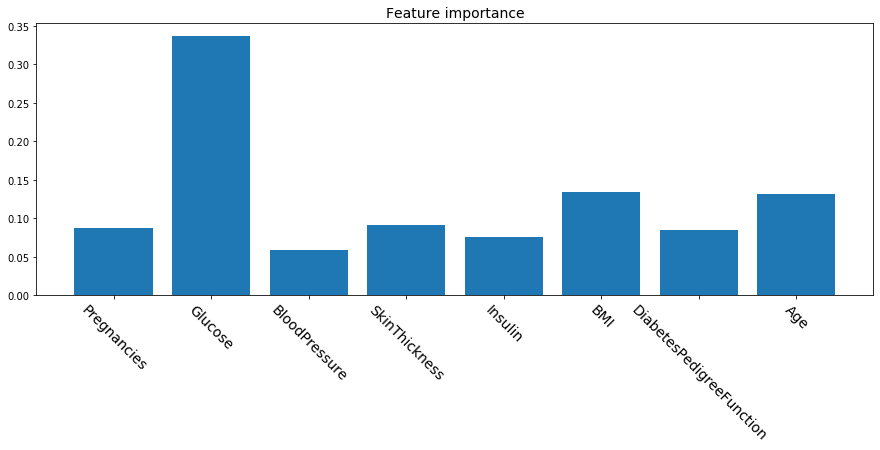

In [54]:

model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X, y)
model.fit(X, y)

print(model.feature_importances_)

plt.figure(figsize=(15, 5))
plt.bar(range(len(X.columns)), model.feature_importances_)
plt.xticks(range(len(X.columns)), X.columns, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()


In [55]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

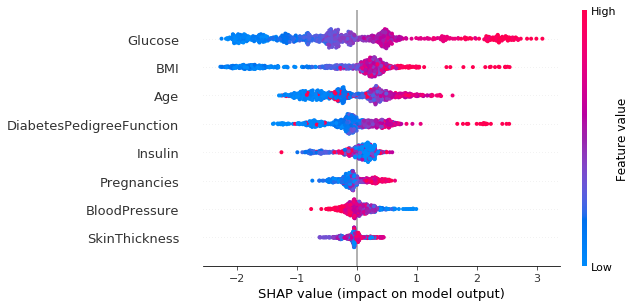

In [56]:
shap.summary_plot(shap_values, X)

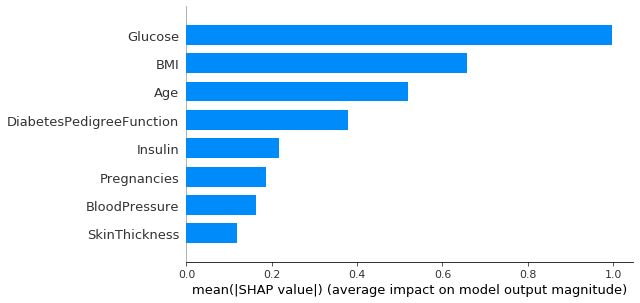

In [57]:
shap.summary_plot(shap_values, X, plot_type="bar")